In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import spacy
import re

### NOTE: Due to the long running time of cleaning the reviews, a file with cleaned reviews is generated beforehand.

# Comparing Raw and Cleaned Movie Review

In [2]:
df = pd.read_csv("./movie_reviews_cleaned.csv")
print("Original Review:\n")
print(df['review'][0])
print("Length: ", len(df['review'][0]))
print("------------------------------")
print("Cleaned Review:\n")
print(df['cleaned_review'][0])
print("Length: ", len(df['cleaned_review'][0]))

Original Review:

Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane  violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.
Length:  655
------------------------------
Cleaned Review:

story man unnatural feel pig start open scene terrific example absurd comedy formal orchestra audience turn insane violent mob crazy chant singers unfortunately stay absurd whole time general narrative eventually make put even era turn cryptic dialogue would make s

In [31]:
'''
nlp = spacy.load("en_core_web_sm")
doc = nlp("story man unnatural feel pig start open scene terrific example absurd comedy formal orchestra audience turn insane violent mob crazy chant singers unfortunately stay absurd whole time general narrative eventually make put even era turn cryptic dialogue would make shakespeare seem easy third grader technical level better might think good cinematography future great vilmos zsigmond future star sally kirkland frederic forrest see briefly")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
'''
text = " This is an important text "
toks = nltk.word_tokenize(text)
x = text.split(' ')
print(x)
print(toks)

['', 'This', 'is', 'an', 'important', 'text', '']
['This', 'is', 'an', 'important', 'text']


# Data Exploration

## Negative Reviews Exploration

In [11]:
neg_df = df[df['label']==0]
num_sample, num_col = neg_df.shape
print("There are %d negative reviews." % num_sample)

There are 25000 negative reviews.


### Top 20 POS Pattern (Using original reviews)

In [32]:
def build_reverse_dict(target_dict):
    count_rev_dict = {}
    for k,v in target_dict.items():
        if count_rev_dict.get(v)==None:
            count_rev_dict[v] = [k]
        else:
            count_rev_dict[v] += [k]
    return count_rev_dict

def find_top_n_words(rev_dict, n = 20):
    result = []
    sorted_key = list(rev_dict.keys())
    sorted_key.sort(reverse=True)
    while len(result)!=n:
        for key in sorted_key:
            current_list = rev_dict[key]
            for word in current_list:
                if word=="br" or word=="< br": #special case
                    continue
                result.append(word)
                if len(result)==n:
                    return result
    return result

def build_pattern_dict(target_df, num_sample, first_pos, second_pos, starting_index = 0):
    pattern_dict = {}
    pattern_list = [first_pos, second_pos]
    for i in range(starting_index, starting_index + num_sample):
        review = target_df['review'][i]
        review = review.lower()
        regex = re.compile("<.*?>")
        review = re.sub(regex, '', review)
        tokens = nltk.word_tokenize(review)
        pos_tag_list = nltk.pos_tag(tokens)
        for i in range(len(pos_tag_list)-1):
            word_list = []
            for j in range(2):
                if pos_tag_list[j+i][1]==pattern_list[j]:
                    word_list.append(pos_tag_list[j+i][0])
            if len(word_list)==2:
                combined = " ".join(word_list)
                if pattern_dict.get(combined)==None:
                    pattern_dict[combined] = 1
                else:
                    pattern_dict[combined]+=1
            else:
                word_list = []
    return pattern_dict

def build_n_gram_dict(target_df, num_sample, starting_index = 0, n = 2):
    n_gram_dict = {}
    for i in range(starting_index, starting_index + num_sample):
        review = target_df['cleaned_review'][i]
        tokens = review.split(" ")
        tokens = [x for x in tokens if x!="br"]
        for i in range(len(tokens)-(n-1)):
            word_list = []
            for j in range(n):
                word_list.append(tokens[i+j])
            combined = " ".join(word_list)
            if n_gram_dict.get(combined)==None:
                n_gram_dict[combined] = 1
            else:
                n_gram_dict[combined]+=1
    return n_gram_dict

In [27]:
my_dict = build_n_gram_dict(neg_df, num_sample, n=2)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 2-Gram (Negative):\n%s" % top_terms)
print("")

my_dict = build_n_gram_dict(neg_df, num_sample, n=3)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 3-Gram (Negative):\n%s" % top_terms)
print("")

my_dict = build_n_gram_dict(neg_df, num_sample, n=4)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 4-Gram (Negative):\n%s" % top_terms)

Top 20 2-Gram (Negative):
['look like', 'ever see', 'watch movie', 'waste time', 'special effect', 'low budget', 'make movie', 'see movie', 'film make', 'movie make', 'main character', 'much better', 'seem like', 'one worst', 'make sense', 'make film', 'year old', 'even though', 'want see', 'bad movie']

Top 20 3-Gram (Negative):
['worst movie ever', 'movie ever see', 'worst film ever', 'film ever see', 'one worst movies', 'worst movies ever', 'movies ever see', 'waste time money', 'one worst film', 'movie ever make', 'film ever make', 'make look like', 'sci fi channel', 'bad act bad', 'waste time watch', 'complete waste time', 'low budget film', 'movie look like', 'movies ever make', 'go see movie']

Top 20 4-Gram (Negative):
['worst movie ever see', 'one worst movies ever', 'worst film ever see', 'worst movies ever see', 'one worst film ever', 'worst film ever make', 'worst movie ever make', 'worst movies ever make', 'life never get back', 'jean claude van damme', 'movie ever see lif

In [33]:
'''
def build_reverse_dict(target_dict):
    count_rev_dict = {}
    for k,v in target_dict.items():
        if count_rev_dict.get(v)==None:
            count_rev_dict[v] = [k]
        else:
            count_rev_dict[v] += [k]
    return count_rev_dict

def find_top_n_words(rev_dict, n = 20):
    result = []
    sorted_key = list(rev_dict.keys())
    sorted_key.sort(reverse=True)
    while len(result)!=n:
        for key in sorted_key:
            current_list = rev_dict[key]
            for word in current_list:
                if word=="br" or word=="< br": #special case
                    continue
                result.append(word)
                if len(result)==n:
                    return result
    return result

def build_pattern_dict(target_df, num_sample, first_pos, second_pos, starting_index = 0):
    pattern_dict = {}
    pattern_list = [first_pos, second_pos]
    for i in range(starting_index, starting_index + num_sample):
        review = target_df['review'][i]
        review = review.lower()
        tokens = nltk.word_tokenize(review)
        pos_tag_list = nltk.pos_tag(tokens)
        for i in range(len(pos_tag_list)-1):
            word_list = []
            for j in range(2):
                if pos_tag_list[j+i][1]==pattern_list[j]:
                    word_list.append(pos_tag_list[j+i][0])
            if len(word_list)==2:
                combined = " ".join(word_list)
                if pattern_dict.get(combined)==None:
                    pattern_dict[combined] = 1
                else:
                    pattern_dict[combined]+=1
            else:
                word_list = []
    return pattern_dict
'''
my_dict = build_pattern_dict(neg_df, num_sample, "JJ", "NN")
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 POS Patterns (JJ NN- Negative):\n%s" % top_terms)
print("")

my_dict = build_pattern_dict(neg_df, num_sample, "VBP", "NN")
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 POS Patterns (VBP NN- Negative):\n%s" % top_terms)
print("")

my_dict = build_pattern_dict(neg_df, num_sample, "NN", "NN")
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 POS Patterns (NN NN- Negative):\n%s" % top_terms)

Top 20 POS Patterns (JJ NN- Negative):
['low budget', 'main character', 'only thing', 'bad movie', 'i guess', 'good movie', 'high school', 'whole movie', 'whole thing', 'new york', 'good thing', 'only reason', 'first time', 'real life', 'same time', 'bad guy', 'long time', 'entire movie', 'first movie', 'first place']

Top 20 POS Patterns (VBP NN- Negative):
['have nothing', 'think i', 'are plenty', 'wish i', 'know i', 'are way', 'are nothing', 'have sex', 'do nothing', 'take place', 'do something', 'have something', 'know nothing', 'mean i', 'want something', 'feel sorry', 'believe i', 'have anything', 'i guess', 'am sorry']

Top 20 POS Patterns (NN NN- Negative):
['movie i', 'film i', 'horror movie', 'horror film', 'character development', 'time i', 'thing i', 'story line', 'camera work', 'i guess', 'reason i', 'tv series', 'tv movie', 'video store', 'plot line', 'action movie', 'tv show', 'science fiction', 'stock footage', 'film festival']


### Top 20 Terms (Using cleaned reviews)

In [53]:
def build_occur_dict(target_df, num_sample, starting_index = 0):
    count_dict = {}
    for i in range(starting_index, starting_index + num_sample):
        review = target_df['cleaned_review'][i]
        for word in review.split(" "):
            if count_dict.get(word)==None:
                count_dict[word] = 1
            else:
                count_dict[word] += 1
    return count_dict

my_dict = build_occur_dict(neg_df, num_sample)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 Terms (Negative):\n%s" % top_terms)

Top 20 Terms (Negative):
['movie', 'film', 'one', 'make', 'like', 'see', 'get', 'even', 'time', 'watch', 'go', 'good', 'bad', 'character', 'would', 'think', 'really', 'look', 'say', 'act']


# Dimension Reduction Analysis

In [3]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
#Projects to dimension specified. Default=2
def project_nd(data,label, num_comp=2):
    svd = TruncatedSVD(n_components=num_comp)
    projected = svd.fit_transform(data)
    print(projected.shape)
    plt.scatter(projected[:, 0], projected[:, 1], edgecolor='none', alpha=0.5)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show();
    return projected

def components_analysis(data,num_comp=200):
    svd = TruncatedSVD(n_components=num_comp).fit(data)
    plt.plot(np.cumsum(svd.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()
    print("Explained variance ratio sum of %d components: %f" % (num_comp,svd.explained_variance_ratio_.sum()))

## TruncatedSVD (CountVectorizer)

In [5]:
X = df['cleaned_review'].values
y = df['label'].values

count_vect_def = CountVectorizer()
count_vect = CountVectorizer(min_df=2)

X_count_def = count_vect_def.fit_transform(X)
X_count = count_vect.fit_transform(X)
print("Number of unique vocabulary (min_df=1): %d" % len(count_vect_def.get_feature_names()))
print("Number of unique vocabulary (min_df=2): %d" % len(count_vect.get_feature_names()))

Number of unique vocabulary (min_df=1): 86237
Number of unique vocabulary (min_df=2): 48565


(50000, 2)


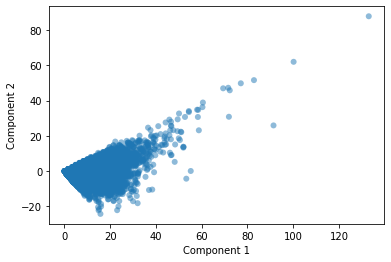

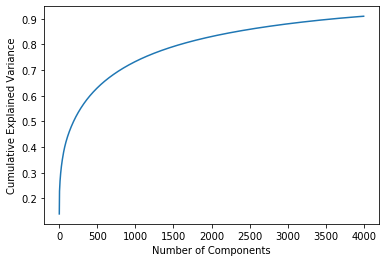

Explained variance ratio sum of 4000 components: 0.909909


In [6]:
project_nd(X_count, y)
components_analysis(X_count, num_comp=4000)

## TruncatedSVD (TfidfVectorizer)

In [7]:
tfidf_vect_def = TfidfVectorizer()
tfidf_vect = TfidfVectorizer(min_df=2)

X_tfidf_def = tfidf_vect_def.fit_transform(X)
X_tfidf = tfidf_vect.fit_transform(X)
print("Number of unique vocabulary (min_df=1): %d" % len(tfidf_vect_def.get_feature_names()))
print("Number of unique vocabulary (min_df=2): %d" % len(tfidf_vect.get_feature_names()))

Number of unique vocabulary (min_df=1): 86237
Number of unique vocabulary (min_df=2): 48565


(50000, 2)


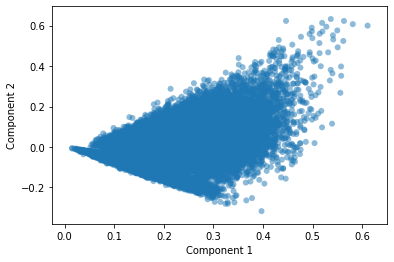

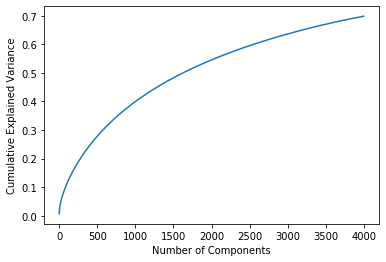

Explained variance ratio sum of 4000 components: 0.698443


In [8]:
project_nd(X_tfidf, y)
components_analysis(X_tfidf, num_comp=4000)

## Positive Reviews Exploration

In [28]:
pos_df = df[df['label']==1]
num_sample, num_col = pos_df.shape
print("There are %d positive reviews." % num_sample)

There are 25000 positive reviews.


### Top 20 N-Gram (Using cleaned reviews)

In [29]:
my_dict = build_n_gram_dict(pos_df, num_sample, num_sample, n=2)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 2-Gram (Positive):\n%s" % top_terms)
print("")

my_dict = build_n_gram_dict(pos_df, num_sample, num_sample, n=3)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 3-Gram (Positive):\n%s" % top_terms)
print("")

my_dict = build_n_gram_dict(pos_df, num_sample,num_sample, n=4)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 4-Gram (Positive):\n%s" % top_terms)

Top 20 2-Gram (Positive):
['one best', 'see movie', 'watch movie', 'film make', 'even though', 'ever see', 'see film', 'first time', 'make film', 'look like', 'highly recommend', 'new york', 'main character', 'must see', 'special effect', 'watch film', 'take place', 'make movie', 'real life', 'years ago']

Top 20 3-Gram (Positive):
['new york city', 'film ever make', 'world war ii', 'one best film', 'one best movies', 'film ever see', 'movie ever see', 'base true story', 'movies ever see', 'well worth watch', 'first time saw', 'would like see', 'would love see', 'first saw movie', 'see long time', 'go see movie', 'highly recommend movie', 'international film festival', 'rock n roll', 'movies ever make']

Top 20 4-Gram (Positive):
['one best movies ever', 'one best movies see', 'best movie ever see', 'one best film see', 'vote eight title brazil', 'one best film ever', 'vote seven title brazil', 'well write well act', 'tony hawk pro skater', 'best movies ever see', 'good guy bad guy', '

### Top 20 POS Pattern (Using original reviews)

In [34]:
my_dict = build_pattern_dict(pos_df, num_sample, "JJ", "NN", num_sample)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 POS Patterns (JJ NN- Positive):\n%s" % top_terms)
print("")

my_dict = build_pattern_dict(pos_df, num_sample, "VBP", "NN", num_sample)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 POS Patterns (VBP NN- Positive):\n%s" % top_terms)
print("")

my_dict = build_pattern_dict(pos_df, num_sample, "NN", "NN", num_sample)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 POS Patterns (NN NN- Positive):\n%s" % top_terms)

Top 20 POS Patterns (JJ NN- Positive):
['first time', 'new york', 'same time', 'great movie', 'real life', 'good movie', 'high school', 'great film', 'long time', 'main character', 'good job', 'great job', 'low budget', 'young man', 'good film', 'little bit', 'true story', 'first film', 'other hand', 'i guess']

Top 20 POS Patterns (VBP NN- Positive):
['know i', 'are plenty', 'have nothing', 'think i', 'take place', 'wish i', 'are part', 'are nothing', 'have something', 'know nothing', 'are way', 'think everyone', 'want something', 'love lucy', 'believe i', 'are today', 'have sex', 'am glad', 'know something', 'have trouble']

Top 20 POS Patterns (NN NN- Positive):
['movie i', 'film i', 'time i', 'world war', 'horror film', 'film festival', 'love story', 'tv series', 'story line', 'horror movie', 'thing i', 'character development', 'science fiction', 'tv show', 'camera work', 'york city', 'box office', 'motion picture', 'star trek', 'action movie']


### Top 20 Terms (Using cleaned reviews)

In [60]:
my_dict = build_occur_dict(pos_df, num_sample, num_sample)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 Terms (Positive):\n%s" % top_terms)

Top 20 Terms (Positive):
['film', 'movie', 'one', 'see', 'make', 'like', 'time', 'get', 'good', 'character', 'well', 'great', 'story', 'watch', 'go', 'show', 'love', 'think', 'also', 'really']
